In [126]:
import pandas as pd
import numpy as np

In [130]:
df_full = pd.read_parquet('/home/d.gaillard/paired_ovarian/fragment_lengh_distibution/fragment_end_motifs_optimized/PGDX25573P_WGS_hg19_mrk_fragment_end_motifs.parquet', engine='fastparquet')

In [131]:
df_full.head()

,read_id,strand,chrom,read1_end_pos,read1_seq,read2_end_pos,read2_seq,fragment_length,gc_content,read1_intersect,read2_intersect,RPR_overlap
0,HWI-D00792:631:CE1RHANXX:5:2209:3870:51009,+,chr1,10027,CTAACCCTAACCCTAACCCT,10159,CTAACCCTAACCCTAACCCT,132,0.507576,False,False,False
1,HWI-D00792:631:CE1RHANXX:5:2316:1330:85872,+,chr1,10057,CTAACCCTAACCCTAACCCT,10178,TAACCCTAACCTAACCCTAA,121,0.512397,False,False,False
2,HWI-D00792:631:CE1RHANXX:5:2312:7444:97944,+,chr1,10050,CCTAACCCTAACCCTAACCC,10196,AACCCTAACCCTAACCCTAA,146,0.506849,False,False,False
3,HWI-D00792:631:CE1RHANXX:5:1115:19669:2498,+,chr1,10020,CCTAACCCTAACCCTAACCC,10136,AACCCTAACCCTAACCCTAA,116,0.508621,False,False,False
4,HWI-D00792:631:CE1RHANXX:5:2213:15902:100704,-,chr1,10189,TAGGGTTAGGGTTAGGGTTA,10002,GGGTTAGGGTTANNNNNNNN,187,0.502674,False,False,False


In [236]:
df = df_full.sample(10000000)

In [237]:
df_mono = pd.DataFrame()

n_bp_downstream = 3
for i in range(10-n_bp_downstream, 10+n_bp_downstream+1):
    df_mono[f'read1_mono_{i-10}'] = df['read1_seq'].str[i]
    df_mono[f'read2_mono_{i-10}'] = df['read2_seq'].str[i]

df_mono['aberrant'] = df['read1_intersect'] | df['read2_intersect']


df_mono['strand'] = df['strand']

df_mono = df_mono[~df_mono.isin(['N', 'P']).any(axis=1)]
df_mono

,read1_mono_-3,read2_mono_-3,read1_mono_-2,read2_mono_-2,read1_mono_-1,read2_mono_-1,read1_mono_0,read2_mono_0,read1_mono_1,read2_mono_1,read1_mono_2,read2_mono_2,read1_mono_3,read2_mono_3,aberrant,strand
14262500,G,A,T,T,C,A,A,A,A,A,A,A,G,C,False,-
12586242,T,A,C,T,T,T,C,C,A,T,T,A,C,A,False,+
14024903,T,T,A,C,A,C,C,T,C,G,A,A,C,A,False,+
4034841,C,G,A,G,A,C,C,T,A,G,T,A,G,C,False,-
11140196,A,G,T,T,C,T,C,A,C,T,C,T,T,T,True,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738502,C,G,T,G,C,C,C,A,A,G,G,G,T,A,False,-
24758900,G,G,A,T,A,G,A,A,A,A,A,G,A,A,False,+
12722768,T,C,C,T,A,G,A,T,T,T,G,C,T,A,False,-
9398744,C,A,A,G,A,A,T,A,C,T,A,A,T,A,False,+


In [257]:
import prince

mca = prince.MCA(
    n_components=10,
    copy=True,
    check_input=True,
).fit(df_mono)

In [258]:
mca.eigenvalues_summary


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.123,4.47%,4.47%
1,0.090,3.26%,7.73%
2,0.086,3.14%,10.87%
3,0.082,2.98%,13.85%
4,0.078,2.85%,16.70%
5,0.078,2.83%,19.53%
6,0.077,2.79%,22.32%
7,0.076,2.78%,25.10%
8,0.075,2.72%,27.82%


In [259]:
column_coordinates = mca.column_coordinates(df_mono)
column_coordinates

,0,1,2,3,4,5,6,7,8,9
read1_mono_-3_A,0.159508,0.268158,-0.251172,-0.242818,0.270766,-0.210731,-0.205612,0.334753,-0.266518,0.051530
read1_mono_-3_C,-0.212979,-0.174433,0.181210,-0.141673,-0.729272,0.225981,-0.006183,-0.370331,0.208842,-0.737817
read1_mono_-3_G,0.169452,0.167635,0.052045,0.069767,0.225559,0.023868,0.169403,0.034875,0.398025,0.115031
read1_mono_-3_T,-0.017614,-0.114096,-0.015754,0.225471,0.293400,-0.061474,0.043597,0.068857,-0.207756,0.492556
read2_mono_-3_A,-0.085294,0.319553,0.081600,-0.244174,-0.073642,-0.171399,-0.018370,0.100508,0.017655,0.002686
read2_mono_-3_C,0.431106,-0.546795,-0.402720,-0.353060,0.239212,-0.275526,-0.119896,-0.452806,0.702926,0.112470
read2_mono_-3_G,-0.123775,0.341033,0.412674,0.035519,-0.100326,0.389471,0.225227,0.130490,0.168575,0.158804
read2_mono_-3_T,-0.087111,-0.209408,-0.114536,0.410967,-0.002805,0.066251,-0.060691,0.080864,-0.532087,-0.171144
read1_mono_-2_A,-0.449926,0.289313,-0.220756,-0.260908,-0.224086,-0.020439,-0.268456,0.140284,-0.093649,-0.359721
read1_mono_-2_C,0.583530,-0.188198,0.127115,-0.142346,-0.445581,0.003614,0.484855,-0.416055,0.036250,0.307038


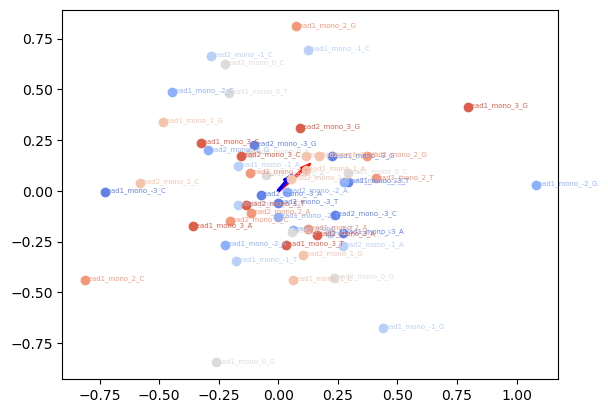

In [260]:
column1 = 4  # replace with your column name
column2 = 6  # replace with your column name

coordinates = column_coordinates[[column1, column2]]
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

color_dict = dict(enumerate(sns.color_palette("coolwarm", 7)))

for index, row in coordinates.iterrows():
    if index.startswith('aberrant') or index.startswith('strand'):
        continue
    color_key = int(index.split('_')[2]) + 3
    plt.plot(row[column1], row[column2], marker='o', color=color_dict[color_key])
    plt.text(row[column1], row[column2], index, fontsize=5, color=color_dict[color_key])

plt.arrow(0, 0, column_coordinates.loc['aberrant_True', column1], column_coordinates.loc['aberrant_True', column2], color='red', width=0.01)
plt.arrow(0, 0, column_coordinates.loc['strand_+', column1], column_coordinates.loc['strand_+', column2], color='blue', width=0.01)

# Displaying the plot
plt.show()


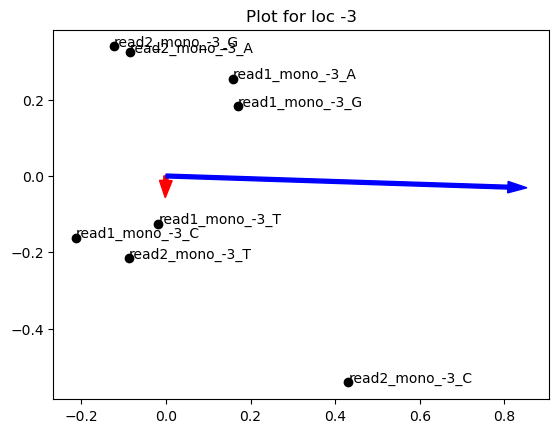

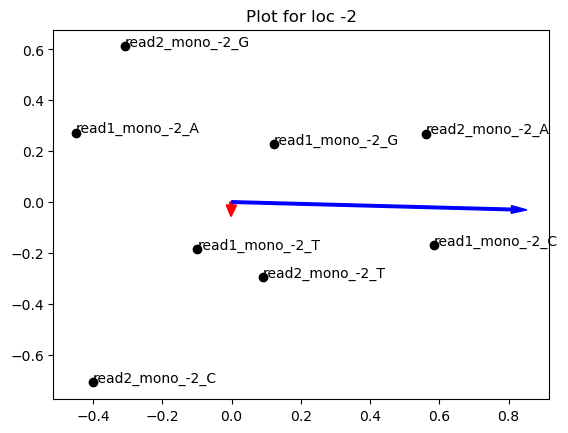

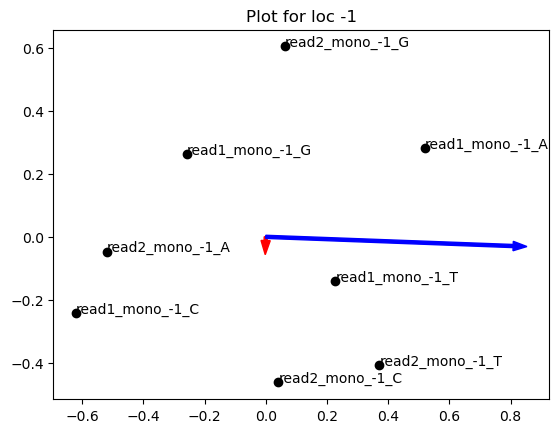

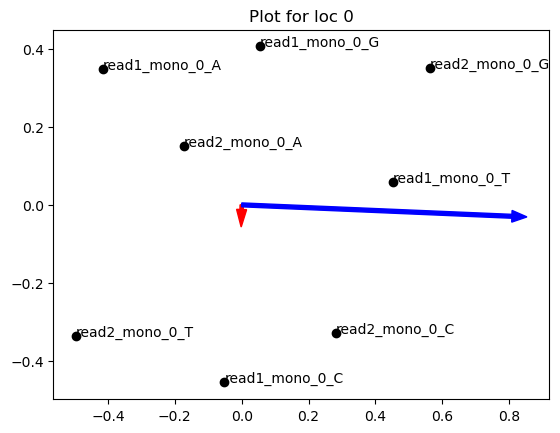

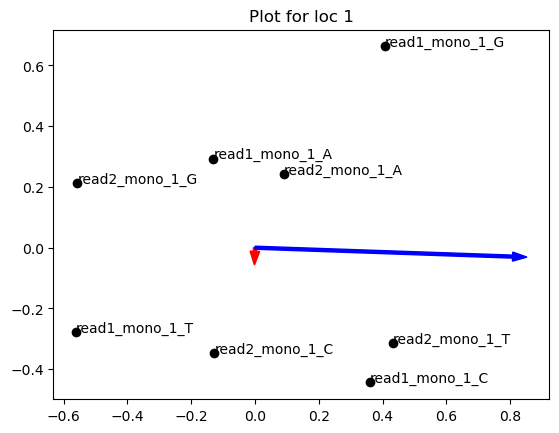

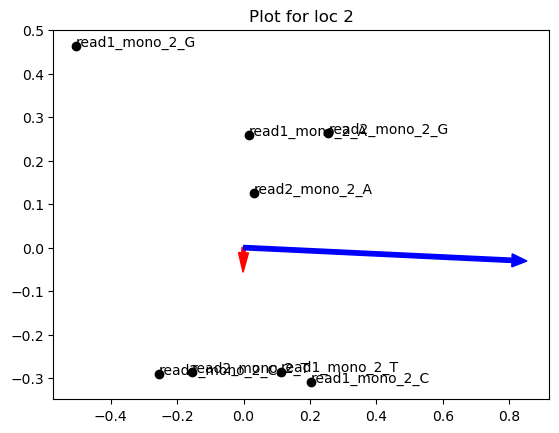

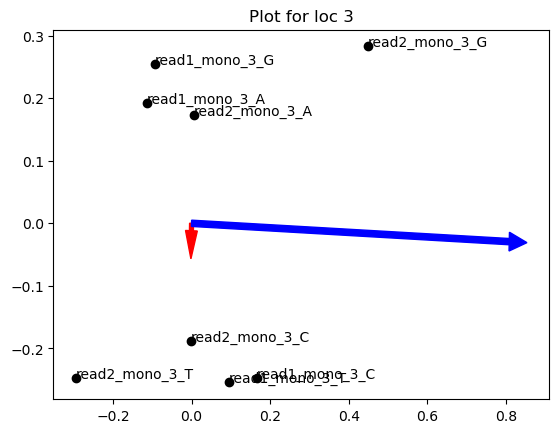

In [255]:
unique_values = set(index.split('_')[2] for index in coordinates.index if not index.startswith('aberrant') and not index.startswith('strand'))

for value in range(-3, 4):
    filtered_coordinates = coordinates[coordinates.index.str.contains(f'_{value}_')]

    plt.figure()  # create a new figure for each unique value

    for index, row in filtered_coordinates.iterrows():
        if index.startswith('aberrant') or index.startswith('strand'):
            continue
        color_key = int(index.split('_')[2]) + 3
        plt.plot(row[column1], row[column2], marker='o', color='k')
        plt.text(row[column1], row[column2], index, fontsize=10, color='k')

    plt.arrow(0, 0, column_coordinates.loc['aberrant_True', column1], column_coordinates.loc['aberrant_True', column2], color='red', width=0.01)
    plt.arrow(0, 0, column_coordinates.loc['strand_+', column1], column_coordinates.loc['strand_+', column2], color='blue', width=0.01)

    plt.title(f'Plot for loc {value}')  # set the title of the plot
    plt.show()  # display the plot

In [256]:

# Your original dataframe
df = pd.DataFrame({
    'read1_mono_-5': ['A', 'C', 'A', 'C'],
    'read2_mono_-5': ['T', 'G', 'G', 'A'],
    'read1_mono_-4': ['T', 'T', 'G', 'T'],
    'read2_mono_-4': ['C', 'T', 'T', 'C'],
    'read1_mono_-3': ['C', 'A', 'T', 'G'],
    'read2_mono_-3': ['G', 'C', 'A', 'T'],
    'read1_mono_-2': ['A', 'G', 'C', 'T'],
    'read2_mono_-2': ['T', 'A', 'G', 'A'],
})

# Create a new dataframe where each column contains the nucleotide and the two neighbouring nucleotides
df_new = pd.DataFrame()

for i in range(len(df.columns) - 2):
    df_new[df.columns[i]] = df.iloc[:, i:i+3].apply(''.join, axis=1)

print(df_new)

  read1_mono_-5 read2_mono_-5 read1_mono_-4 read2_mono_-4 read1_mono_-3  \
0           ATT           TTC           TCC           CCG           CGA   
1           CGT           GTT           TTA           TAC           ACG   
2           AGG           GGT           GTT           TTA           TAC   
3           CAT           ATC           TCG           CGT           GTT   

  read2_mono_-3  
0           GAT  
1           CGA  
2           ACG  
3           TTA  


In [147]:
df_encoded = pd.get_dummies(df_mono, prefix_sep='_')
df_encoded

,aberrant,read1_mono_-10_A,read1_mono_-10_C,read1_mono_-10_G,read1_mono_-10_N,read1_mono_-10_T,read2_mono_-10_A,read2_mono_-10_C,read2_mono_-10_G,read2_mono_-10_T,...,read2_mono_8_T,read1_mono_9_A,read1_mono_9_C,read1_mono_9_G,read1_mono_9_T,read2_mono_9_A,read2_mono_9_C,read2_mono_9_G,read2_mono_9_N,read2_mono_9_T
0,False,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,False,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,False,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,False,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,False,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
99996,False,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
99997,True,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
99998,False,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [158]:
df_pivot = df_encoded.pivot_table(index='aberrant', aggfunc='sum')[df_encoded.columns.drop('aberrant').to_list()]
df_pivot = df_pivot[df_pivot.columns.drop(list(df_pivot.filter(regex='N$')))]
df_pivot


,read1_mono_-10_A,read1_mono_-10_C,read1_mono_-10_G,read1_mono_-10_T,read2_mono_-10_A,read2_mono_-10_C,read2_mono_-10_G,read2_mono_-10_T,read1_mono_-9_A,read1_mono_-9_C,...,read2_mono_8_G,read2_mono_8_T,read1_mono_9_A,read1_mono_9_C,read1_mono_9_G,read1_mono_9_T,read2_mono_9_A,read2_mono_9_C,read2_mono_9_G,read2_mono_9_T
aberrant,,,,,,,,,,,,,,,,,,,,,
False,19707,19677,18951,19383,19403,20220,19241,18856,19423,20391,...,20284,19133,18600,19630,19801,19689,19535,19138,19557,19488
True,5507,5607,5600,5565,5495,5819,5602,5364,5349,5913,...,5807,5431,5397,5736,5714,5433,5413,5664,5612,5591
